In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import os
import warnings

import src.data_processing as dp
import src.modelling as md
warnings.filterwarnings("ignore")

data_folder_path = 'data'

In [2]:
# Load the data
SPAC_MAIN_FILE = 'List of Companies That Have Merged With A SPAC.csv'
df = pd.read_csv(os.path.join(data_folder_path, SPAC_MAIN_FILE))

df = df.dropna(subset=['SPAC merger completion date'])
df['SPAC merger completion date'] = pd.to_datetime(df['SPAC merger completion date'])

df.tail()

,Symbol,Name,SPAC IPO date,SPAC merger completion date,Market cap,Industry,Momentum factor 10,Momentum factor 200,Last Close Price,Shares outstanding,Average trading volume,% traded,Action
159,ASTS,"AST SpaceMobile, Inc. - Class A",11/01/2019,2021-04-06,"$413,732,947",Telecom Services,0.99,0.88,6.04,"71,210,490","1,744,585",2.45%,Analyze
160,AEVA,"Aeva Technologies, Inc.",02/27/2020,2021-03-12,"$309,887,635",Auto Parts,0.91,0.62,1.42,"218,230,729","1,267,354",0.58%,Analyze
161,OUST,"Ouster, Inc.",10/09/2020,2021-03-11,"$167,066,287",Electronic Components,0.97,0.67,0.90,"184,746,530","4,758,714",2.58%,Analyze
162,CHPT,"ChargePoint Holdings, Inc.",09/16/2019,2021-03-09,"$3,437,343,736",Specialty Retail,1.05,0.77,10.06,"341,684,268","9,319,746",2.73%,Analyze
163,OPEN,Opendoor Technologies Inc,06/18/2020,2020-12-18,"$1,092,352,389",Real Estate Services,1.11,0.52,1.69,"642,560,229","24,795,736",3.86%,Analyze


                            Symbol
SPAC merger completion date       
2022-05-09                    EVEX
2022-05-02                     SAI
2022-05-02                     SMR
2022-04-27                    SOUN
2022-04-05                    MLTX


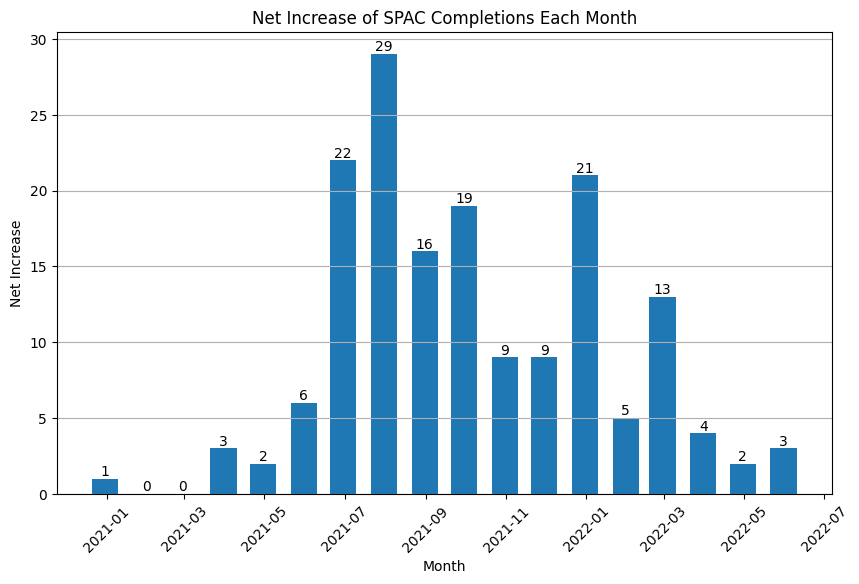

In [3]:
# plot the histogram of the net increase of SPACs in each month

# Set the 'Completion_Date' column as the index
df_month = df[['Symbol','SPAC merger completion date']]
df_month['SPAC merger completion date'] = pd.to_datetime(df['SPAC merger completion date'])
df_month.set_index('SPAC merger completion date', inplace=True)
print(df_month.head())

# Resample the data by month and count the number of occurrences
monthly_counts = df_month.resample('M').count()
monthly_counts.columns = ['Net Increase']

# Plot histogram
plt.figure(figsize=(10, 6))
p1 = plt.bar(monthly_counts.index, monthly_counts['Net Increase'],width = 20)
plt.bar_label(p1,label_type ='edge')
plt.title('Net Increase of SPAC Completions Each Month')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Net Increase')
plt.grid(axis = 'y')
plt.show()


In [4]:
# Get the latest completion date
latest_completion_date = df['SPAC merger completion date'].max()
earliest_completion_date = df['SPAC merger completion date'].min()
set_end_date = "2023-06-01"
print(f'The latest completion date is: {latest_completion_date}\n'
      f'The earliest completion date is: {earliest_completion_date}\n'
      f'The end date is: {set_end_date}')

The latest completion date is: 2022-05-09 00:00:00
The earliest completion date is: 2020-12-18 00:00:00
The end date is: 2023-06-01


In [5]:
SPAC_ALL_FILE = 'SPACs that have not announced a merger.csv'
df_spac_all = pd.read_csv(os.path.join(data_folder_path, SPAC_ALL_FILE))
df_spac_all['IPO date'] = pd.to_datetime(df_spac_all['IPO date'])

df_spac_all.head()

,Symbol,Name,IPO date,Market cap,IPO book value,Last Close Price,Price over book %,Shares outstanding,Average trading volume,% traded,Action
0,HPX,HPX Corp. Class A,2020-09-08,"$38,241,878",10.0,17.16,71.6,"2,176,544","504,574",23.18%,Analyze
1,PONO,Pono Capital Corp Class A,2021-10-08,"$135,381,009",10.0,15.75,57.5,"12,251,675","120,427",0.98%,Analyze
2,CNTQ,Chardan NexTech Acquisition 2 Corp. Class A,2021-08-24,"$87,581,872",10.0,14.00,40.0,"6,255,848","94,431",1.51%,Analyze
3,RICO,Agrico Acquisition Corp. - Class A,2007-12-28,$0,10.0,13.36,33.6,"14,518,750","25,738",0.18%,Analyze
4,IGNY,Ignyte Acquisition Corp.,2021-03-12,"$95,101,875",10.0,13.05,30.5,"7,287,500","177,660",2.44%,Analyze


PONO: No timezone found, symbol may be delisted
CNTQ: No timezone found, symbol may be delisted
IGNY: No timezone found, symbol may be delisted
SMIH: No timezone found, symbol may be delisted
LMAO: No timezone found, symbol may be delisted
LJAQ: No timezone found, symbol may be delisted
LSPR: No timezone found, symbol may be delisted
EBAC: No timezone found, symbol may be delisted
VENA: No timezone found, symbol may be delisted
TINV: No timezone found, symbol may be delisted
MEOA: No timezone found, symbol may be delisted
JATT: No timezone found, symbol may be delisted
PTIC: No timezone found, symbol may be delisted
TPBA: No timezone found, symbol may be delisted
BMAQ: No timezone found, symbol may be delisted
CENQ: No timezone found, symbol may be delisted
BWAC: No timezone found, symbol may be delisted
OXAC: No timezone found, symbol may be delisted
ATA: No timezone found, symbol may be delisted
GGAA: No timezone found, symbol may be delisted
COVA: No timezone found, symbol may be de

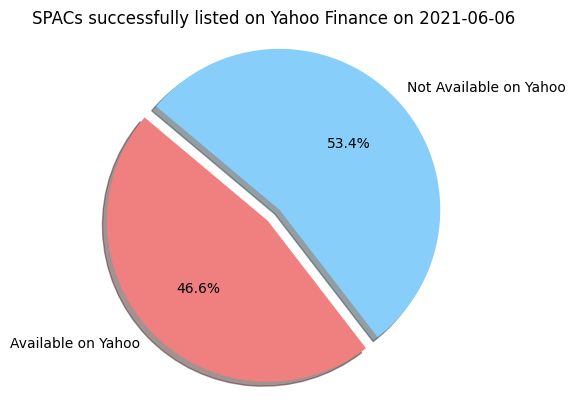

In [6]:
# Filter for IPOs between t1 and t2
filtered_df = df_spac_all[(df_spac_all['IPO date'] >= earliest_completion_date) & (df_spac_all['IPO date'] <= set_end_date)]

filtered_df['Available on Yahoo'] = filtered_df['Symbol'].apply(lambda x: dp.check_yahoo_availability(x, set_end_date, "2023-06-06" ))

available_count = filtered_df['Available on Yahoo'].notnull().sum()
not_available_count = len(filtered_df) - available_count

# Plot pie chart
labels = ['Available on Yahoo', 'Not Available on Yahoo']
sizes = [available_count, not_available_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("SPACs successfully listed on Yahoo Finance on 2021-06-06")
plt.show()

In [7]:
df_price = pd.DataFrame()
df_volume = pd.DataFrame()

df['Symbol'].apply(lambda symbol: dp.fetch_data(symbol, latest_completion_date, set_end_date, df_price, df_volume))

df_price.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QTEK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QNGY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CORZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSRD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GRNA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VORB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRDS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BOXD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LTRY']: Exception("%ticker%: Data doesn't exist for startDate = 1652068800, endDate = 1685592000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EMBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RDBX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENJY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLBZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRXT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCOR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VLTA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CYXT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMFR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BGRY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ELMS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTRA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZEV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,EVEX,SAI,SMR,SOUN,MLTX,LLAP,FRGE,DRTS,RGTI,QTEK,...,OWL,BLDE,ZEV,SKIN,STEM,ASTS,AEVA,OUST,CHPT,OPEN
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-10,8.66,5.200,10.30,8.94,5.69,4.25,25.129999,6.95,5.68,NaN,...,10.99,6.15,NaN,12.50,6.94,6.96,2.87,26.200001,10.27,5.86
2022-05-11,9.37,5.100,10.19,7.19,5.00,4.05,24.860001,5.19,6.07,NaN,...,10.48,5.60,NaN,10.60,6.32,7.02,2.57,23.700001,8.95,5.38
2022-05-12,6.44,5.470,9.84,6.62,4.97,4.33,28.049999,5.73,6.85,NaN,...,10.56,5.87,NaN,10.63,6.48,7.61,2.79,24.799999,9.62,6.26
2022-05-13,6.35,5.268,9.62,6.79,5.07,4.08,28.090000,7.00,7.76,NaN,...,11.13,6.65,NaN,11.94,7.76,7.67,3.17,27.500000,10.39,7.27
2022-05-16,7.63,5.520,9.78,6.10,4.69,3.76,17.490000,6.94,7.46,NaN,...,11.12,6.63,NaN,11.64,7.23,7.01,3.20,25.600000,9.94,7.16


Stock daily return can be calculated in a few different ways, depending on the context and the specific information you're trying to extract. Here are the primary methods:

1. **Close-to-Close Return (most common)**: This method calculates the percentage change in the closing price of a stock from one day to the next.
   
   \[ \text{Return}_t = \frac{\text{Close Price}_t - \text{Close Price}_{t-1}}{\text{Close Price}_{t-1}} \]
   
   In Python using pandas:
   
   ``` python
   df['Return'] = df['Close'].pct_change()
   ```

2. **Intraday Return**: This measures the return of a stock within a single trading day.
   
   \[ \text{Intraday Return}_t = \frac{\text{Close Price}_t - \text{Open Price}_t}{\text{Open Price}_t} \]
   
   In Python:
   
   ``` python
   df['Intraday Return'] = (df['Close'] - df['Open']) / df['Open']
   ```

The method you choose depends on your goals.

- If you're analyzing the behavior of a stock from one day to the next, then you'd typically use the **Close-to-Close Return**. This is the most common method when people refer to daily stock returns.
  
- If you're more interested in how a stock performs within a single trading day, then you'd use the **Intraday Return**.

For the calculations of CAR and BHAR that we discussed earlier, the Close-to-Close Return is typically used. However, if you have a specific research question that focuses on intraday movements, then the intraday return might be relevant. Always choose the method that aligns with your specific analysis objectives.

In [8]:
# calculate the daily returns. Denoted as percentage, close on x - close on(x-1)/ close on (x-1) ---- so no data on the first day
df_return = (df_price.pct_change()*100).T
df_return.head(10)

Date,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-23,...,2023-05-17,2023-05-18,2023-05-19,2023-05-22,2023-05-23,2023-05-24,2023-05-25,2023-05-26,2023-05-30,2023-05-31
EVEX,NaN,8.198615,-31.270009,-1.397518,20.157484,11.795539,-16.881590,17.771512,6.227539,2.480274,...,3.452685,13.102589,-4.808739,2.181396,-9.101118,0.865262,-0.490196,3.078818,-4.181594,-0.374073
SAI,NaN,-1.923075,7.254900,-3.692864,4.783596,-0.181155,7.985473,5.882360,-2.238099,1.185257,...,6.060600,-3.333330,-5.911330,-6.282723,-5.586587,-4.142015,0.617283,-10.429445,19.863011,-10.857146
SMR,NaN,-1.067967,-3.434734,-2.235775,1.663200,0.715753,-2.538071,2.499998,0.609751,-2.323228,...,2.774272,-4.417174,-1.283696,5.461633,7.398279,-8.381171,-0.877195,-1.517066,-3.722721,0.000000
SOUN,NaN,-19.574940,-7.927680,2.567977,-10.162004,1.967211,-16.559482,-6.358380,-1.440333,7.306887,...,9.917355,6.390971,-3.533566,15.384618,-6.984128,1.706483,0.000000,-4.026850,9.090909,-2.243588
MLTX,NaN,-12.126539,-0.600004,2.012080,-7.495071,1.492541,1.890749,0.206190,8.847733,-5.671081,...,4.451042,-0.248578,-1.922396,-1.669688,0.959765,-0.146256,4.503850,-4.274706,2.086383,-2.438151
LLAP,NaN,-4.705878,6.913573,-5.773672,-7.843136,20.212766,10.619469,-3.800001,7.692305,8.494210,...,-0.641025,-3.225803,0.000000,11.333330,-6.586827,-8.333333,-13.286709,-4.032254,-3.361351,1.739129
FRGE,NaN,-1.074407,12.831853,0.142606,-37.735850,25.100054,-2.285192,-2.385399,-15.141359,18.859403,...,4.724414,-2.255646,-12.307690,10.526316,0.793650,0.000000,1.574802,3.875975,4.477608,2.857149
DRTS,NaN,-25.323738,10.404623,22.164048,-0.857142,-10.374644,2.813508,-17.904613,3.047616,6.099814,...,-1.179947,2.985079,4.057967,10.863513,-6.783919,3.504040,-1.562499,2.380950,1.291995,1.275509
RGTI,NaN,6.866203,12.850078,13.284676,-3.865982,2.949059,-4.947912,9.315066,8.395985,2.543356,...,3.696497,8.630395,-12.435228,44.773173,0.544952,4.336044,3.506495,34.253459,-3.738325,-8.834948
QTEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_return_gics = dp.df_map2gics(df_return, df)
df_price_gics = dp.df_map2gics(df_price.T, df)
df_return_gics.head()

Date,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-23,...,2023-05-17,2023-05-18,2023-05-19,2023-05-22,2023-05-23,2023-05-24,2023-05-25,2023-05-26,2023-05-30,2023-05-31
GICS_Sector,,,,,,,,,,,,,,,,,,,,,
Communication Services,NaN,0.444303,5.877467,5.284616,0.269530,1.785056,-1.362707,2.916368,3.272145,0.192613,...,3.211321,-1.562226,-3.605053,3.009377,1.998887,-3.242550,-1.534427,-0.175571,-1.558475,0.173682
Consumer Discretionary,NaN,-2.169923,4.491761,5.531338,-2.876289,5.260941,-2.924955,1.804407,-1.062143,1.508150,...,3.827699,5.254888,-0.946016,1.271973,-1.135533,-0.151936,-0.495653,2.659211,2.939948,1.637659
Consumer Staples,NaN,0.040113,-2.498709,9.959383,7.181499,2.054280,-7.368144,4.632264,1.849044,1.891784,...,2.068405,9.665168,4.316466,0.294134,-0.775838,-3.435256,-1.136503,2.908412,-1.335088,-4.437105
Electric Vehicle,NaN,-6.410771,8.202307,10.860864,-0.919068,6.324982,0.953515,2.807138,-1.007180,-2.616209,...,7.259875,-1.177670,-0.600393,8.079761,-0.884812,-3.259291,-0.999782,2.094867,2.343787,-2.235288
Financials,NaN,-3.996320,1.855106,10.643370,-0.337307,6.339556,-1.129703,2.622583,-0.248030,1.200068,...,1.475164,0.468868,-0.639482,1.802230,-0.132019,-2.714053,-2.514573,-0.794536,4.906575,0.610675


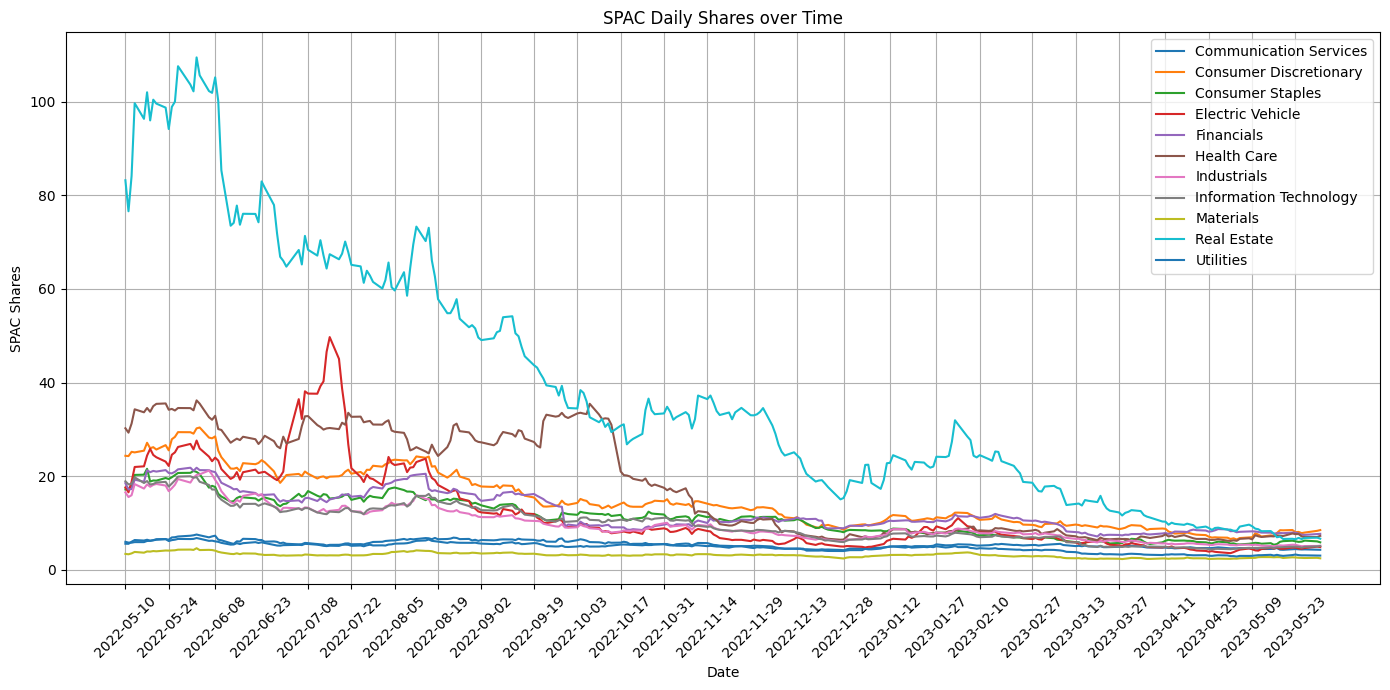

In [10]:
plt.figure(figsize=(14,7))
# Iterate through each row in the dataframe and plot
for index, row in df_price_gics.iterrows():
    plt.plot(row.index, row.values, label=index)

n = 10  # Display every 3rd date
selected_xticks = df_price_gics.columns[::n]
plt.xticks(selected_xticks, rotation=45)

plt.legend(loc="upper right")
plt.title("SPAC Daily Shares over Time")
plt.xlabel("Date")
plt.ylabel("SPAC Shares")
plt.grid(True)
plt.tight_layout()
plt.show()

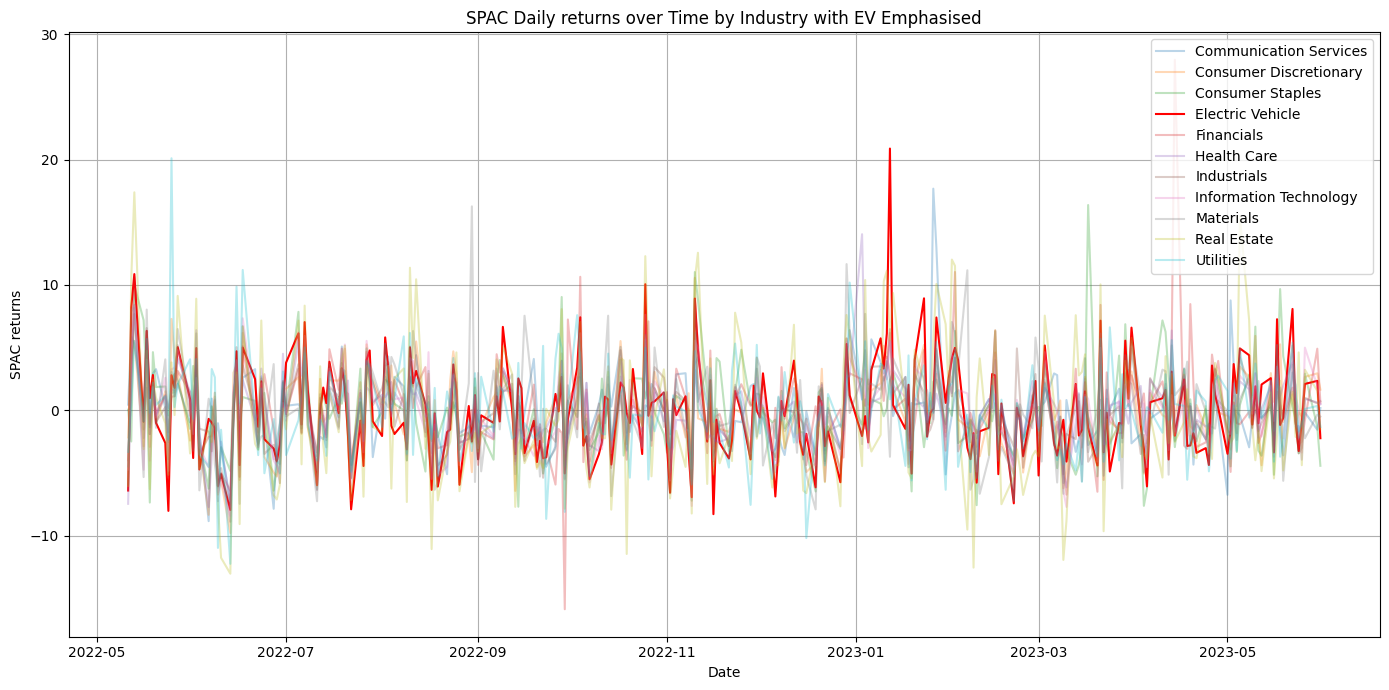

In [11]:
plt.figure(figsize=(14,7))
# Iterate through each row in the dataframe and plot
for index, row in df_return_gics.iterrows():
  if index == 'Electric Vehicle':
    plt.plot(row.index, row.values, label=index,color = 'red' , alpha = 1)
  else:
    plt.plot(row.index, row.values, label=index, alpha = 0.3)

plt.legend(loc="upper right")
plt.title("SPAC Daily returns over Time by Industry with EV Emphasised")
plt.xlabel("Date")
plt.ylabel("SPAC returns")
plt.grid(True)
plt.tight_layout()
plt.show()

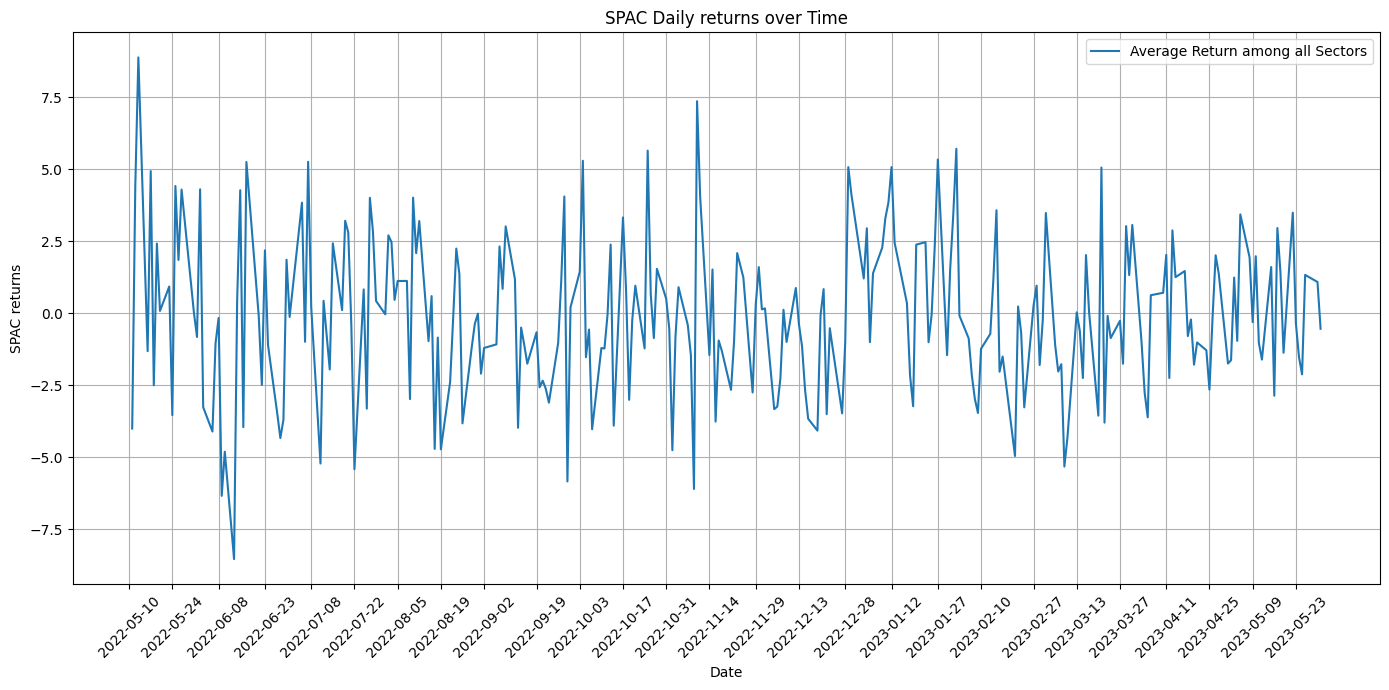

In [12]:
plt.figure(figsize=(14,7))
plt.plot(df_return_gics.mean(), label = 'Average Return among all Sectors' , alpha = 1)
n = 10  # Display every 3rd date
selected_xticks = df_return_gics.columns[::n]
plt.xticks(selected_xticks, rotation=45)

plt.legend(loc="upper right")
plt.title("SPAC Daily returns over Time")
plt.xlabel("Date")
plt.ylabel("SPAC returns")
plt.grid(True)
plt.tight_layout()
plt.show()

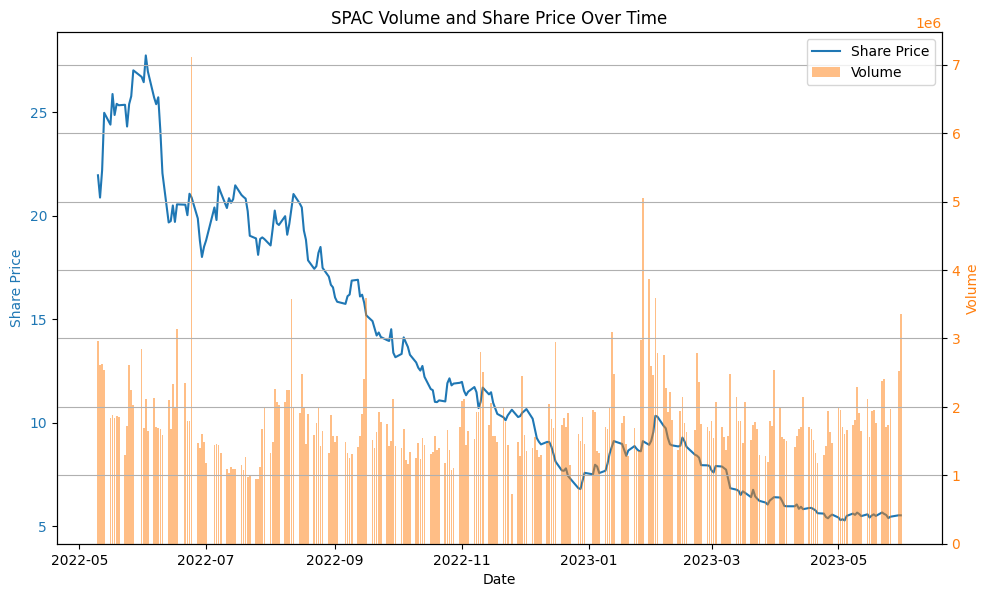

In [13]:
# Plotting fig of volume and price
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Share_Price with ax1
ax1.set_xlabel('Date')
ax1.set_ylabel('Share Price', color='tab:blue')
ax1.plot(df_price_gics.mean(), color='tab:blue', label='Share Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for Volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(df_price_gics.mean().index, df_volume.T.mean(), color='tab:orange', alpha=0.5, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.tight_layout()
plt.title('SPAC Volume and Share Price Over Time')
plt.grid(True)
plt.show()

In [14]:
# acquire the data of Russell 2000 and VIX as the market benchmark
df_russell_vix = pd.DataFrame()
russell_data = yf.download('^RUT', start=latest_completion_date, end= set_end_date)
vix_data = yf.download('^VIX', start=latest_completion_date, end= set_end_date)

df_russell_vix['RUSSELL'] = russell_data['Close'].pct_change() * 100
df_russell_vix['VIX'] = vix_data['Close']

df_russell_vix

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,RUSSELL,VIX
Date,,
2022-05-09,NaN,34.750000
2022-05-10,-0.016453,32.990002
2022-05-11,-2.477595,32.560001
2022-05-12,1.236220,31.770000
2022-05-13,3.063738,28.870001
...,...,...
2023-05-24,-1.158463,20.030001
2023-05-25,-0.701756,19.139999
2023-05-26,1.049814,17.950001


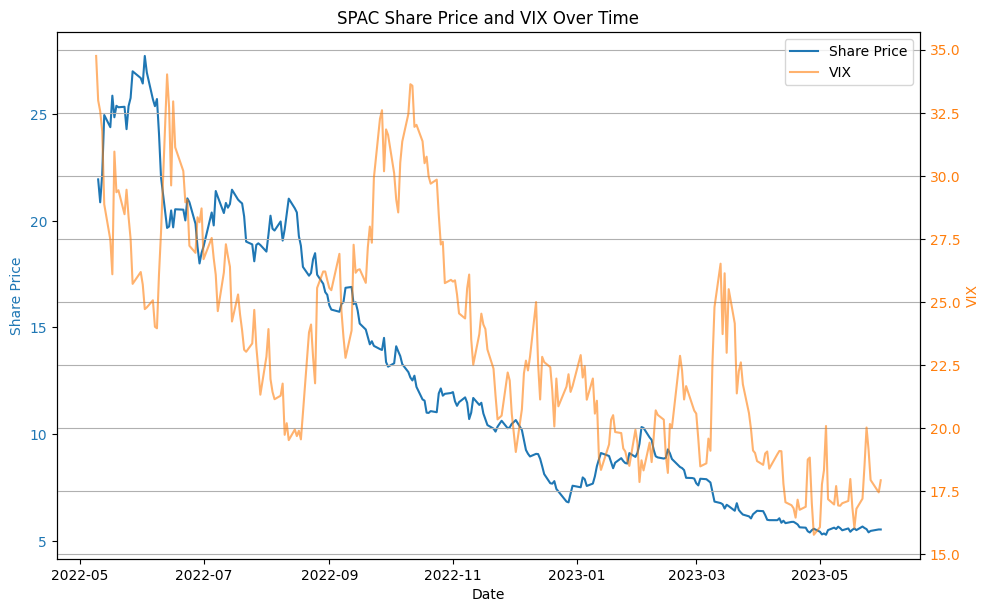

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Share_Price with ax1
ax1.set_xlabel('Date')
ax1.set_ylabel('Share Price', color='tab:blue')
ax1.plot(df_price_gics.mean(), color='tab:blue', label='Share Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for Volume
ax2 = ax1.twinx()
ax2.set_ylabel('VIX', color='tab:orange')
ax2.plot(df_russell_vix['VIX'], color='tab:orange', alpha=0.6, label='VIX')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


fig.tight_layout()
plt.title('SPAC Share Price and VIX Over Time')
plt.grid(True)
plt.show()

https://blog.csdn.net/qq_42294351/article/details/119815102

In [16]:
df_mean_return = df_return.mean().to_frame()
df_mean_return.columns = ['SPAC']

merged_df = pd.merge(df_mean_return, df_russell_vix, on='Date')
df_return_russell_vix = merged_df.dropna()
df_return_russell_vix.head()

,SPAC,RUSSELL,VIX
Date,,,
2022-05-11,-4.954170,-2.477595,32.560001
2022-05-12,4.258989,1.236220,31.770000
2022-05-13,8.422018,3.063738,28.870001
2022-05-16,-1.963555,-0.515432,27.469999
2022-05-17,4.623802,3.188799,26.100000


In [17]:
cumulative_length = 10
df_AR = df_return_russell_vix.copy()

df_AR['Abnormal Return'] = df_AR['SPAC'] - df_AR['RUSSELL']
df_AR['Cumulative AR'] = df_AR['Abnormal Return'].rolling(window=cumulative_length).sum()
df_AR['Buy-and-Hold AR'] = (1 + df_AR['SPAC']).rolling(window=cumulative_length).apply(lambda x: x.prod()) - (1 + df_AR['RUSSELL']).rolling(window=cumulative_length).apply(lambda x: x.prod())
df_AR = df_AR.dropna()
df_AR.head(15)

,SPAC,RUSSELL,VIX,Abnormal Return,Cumulative AR,Buy-and-Hold AR
Date,,,,,,
2022-05-24,-3.340606,-1.557936,29.450001,-1.782670,7.233191,13644.762928
2022-05-25,3.563058,1.945234,28.370001,1.617823,11.327590,-15807.387895
2022-05-26,2.263795,2.172122,27.500000,0.091673,8.396494,-9926.848191
2022-05-27,4.223357,2.701499,25.719999,1.521858,4.560072,-5577.108489
2022-05-31,0.370253,-1.263837,26.190001,1.634091,7.642286,7765.419595
2022-06-01,-1.013605,-0.494630,25.690001,-0.518975,5.688307,-6.135916
2022-06-02,4.178696,2.310203,24.719999,1.868494,6.228546,62.102672
2022-06-03,-2.716213,-0.770418,24.790001,-1.945795,2.224465,-46.203661
2022-06-06,-4.924280,0.363239,25.070000,-5.287519,-2.960106,224.079994


In [18]:
OLS_spac_russell = md.regression_OLS(df_return_russell_vix, dependent_var = 'SPAC', independent_var = 'RUSSELL')
print(OLS_spac_russell.summary())

                            OLS Regression Results                            
Dep. Variable:                   SPAC   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     469.9
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.82e-60
Time:                        00:16:27   Log-Likelihood:                -499.21
No. Observations:                 265   AIC:                             1002.
Df Residuals:                     263   BIC:                             1010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1425      0.098     -1.452      0.1

In [19]:
OLS_spac_car = md.regression_OLS(df_AR, dependent_var = 'SPAC', independent_var = 'Cumulative AR')
print(OLS_spac_car.summary())

                            OLS Regression Results                            
Dep. Variable:                   SPAC   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     29.50
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.31e-07
Time:                        00:16:31   Log-Likelihood:                -592.88
No. Observations:                 256   AIC:                             1190.
Df Residuals:                     254   BIC:                             1197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0669      0.160      0.418

In [20]:
OLS_spac_bhar = md.regression_OLS(df_AR, dependent_var = 'SPAC', independent_var = 'Buy-and-Hold AR')
print(OLS_spac_bhar.summary())

                            OLS Regression Results                            
Dep. Variable:                   SPAC   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.817
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0945
Time:                        00:16:34   Log-Likelihood:                -605.54
No. Observations:                 256   AIC:                             1215.
Df Residuals:                     254   BIC:                             1222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1916      0.162     

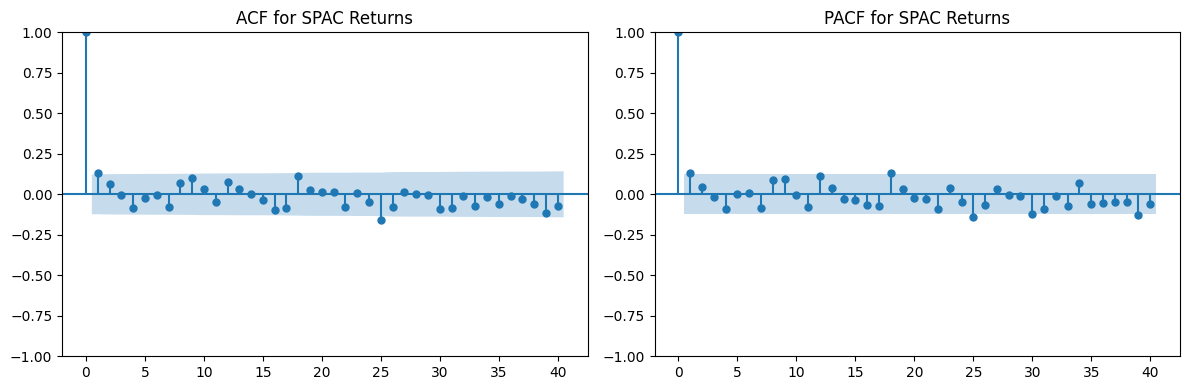

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df_AR['SPAC'], lags=40, ax=ax1)
ax1.set_title('ACF for SPAC Returns')
plot_pacf(df_AR['SPAC'], lags=40, ax=ax2)
ax2.set_title('PACF for SPAC Returns')

plt.tight_layout()
plt.show()

Best ARMA Order: (3, 0, 2) with AIC: 1215.3034615480906
Model Coefficients:      lower SPAC  upper SPAC
256   -4.156545    5.716240
257   -5.428881    4.545866
258   -5.759479    4.245489
259   -4.417086    5.587864
260   -5.227481    4.785158
261   -5.869571    4.150574
262   -4.572744    5.447636
263   -5.019980    5.009664
264   -5.910479    4.123111
265   -4.760507    5.274775
266   -4.847320    5.196863
267   -5.889458    4.156078
268   -4.962807    5.086394
269   -4.720186    5.336257
270   -5.815440    4.241103
271   -5.162354    4.899513
272   -4.644422    5.422351
273   -5.700489    4.366440
274   -5.343863    4.729184
275   -4.621164    5.454484
276   -5.558522    4.518246
277   -5.495104    4.587542
278   -4.647210    5.436327
279   -5.404028    4.681934
280   -5.607575    4.483169
281   -4.715702    5.375107
282   -5.250887    4.843444
283   -5.676784    4.420786
284   -4.817044    5.280629
285   -5.111369    4.990351


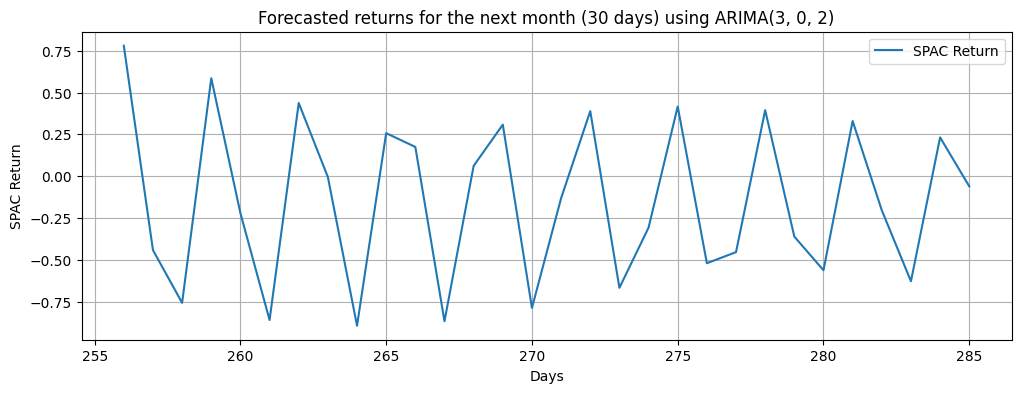

In [23]:
p_q_order = md.order_ARIMA(df_AR['SPAC'])
forecasted_returns, conf_int = md.forecast_ARIMA(df_AR['SPAC'], order=p_q_order, forecast_steps=30)
print('Model Coefficients:', conf_int)

# Plotting 
fig = plt.figure(figsize=(12, 4))
plt.plot(forecasted_returns, label = 'SPAC Return')
plt.title("Forecasted returns for the next month (30 days) using ARIMA" + str(p_q_order))
plt.xlabel("Days")
plt.ylabel("SPAC Return")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

optimal_lag: 1


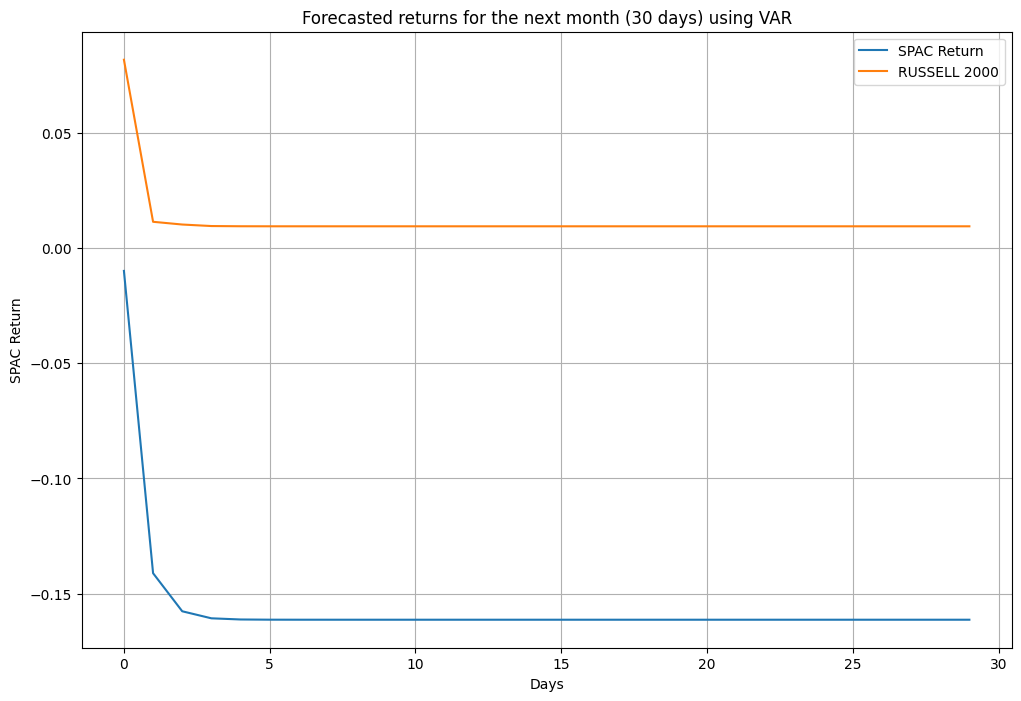

In [24]:
forecasted_returns = md.forecast_VAR(df_AR[['SPAC', 'RUSSELL']], maxlags=12, forecast_steps=30)

# Plotting
fig = plt.figure(figsize=(12, 8))
plt.plot(forecasted_returns, label=['SPAC Return', 'RUSSELL 2000'])
plt.title("Forecasted returns for the next month (30 days) using VAR")
plt.xlabel("Days")
plt.ylabel("SPAC Return")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()